In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import funciones_MBA as fMBA
import seaborn as sns

In [2]:
#Parámetros
n_neu = 100
pasos = 300
peso_inicial = 10

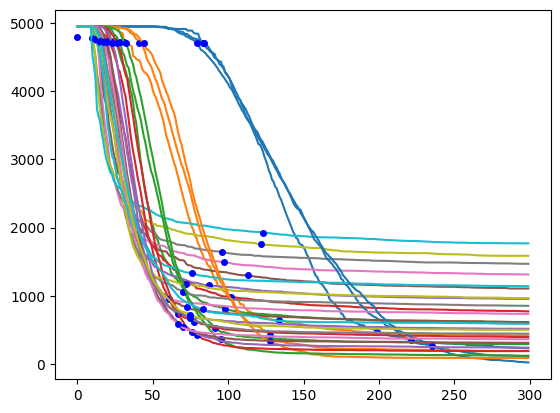

In [10]:
dicc_tau_medio={}
dicc_tau_95 = {}
dicc_tau_05 = {}
lista_grados = []

#Gráfico para distintos estimulos 
for cantidad_estim in [1, 2, 4]:
    for largo_estim in [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
        nucleo, coclea = fMBA.iniciar_red(n_neu, peso_inicial)
        lista_vertices = fMBA.entrenar(nucleo, coclea, largo_estim, cantidad_estim, pasos)
        
        dicc_tau_95[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 95)[0]
        dicc_tau_05[(cantidad_estim, largo_estim)] = fMBA.x_tau_porcentaje(lista_vertices, 5)[0]
        dicc_tau_medio[(cantidad_estim, largo_estim)] = fMBA.x_tau_medio(lista_vertices)[0]
        
        lista_grados.append(list(dict(nucleo.degree()).values()))
        plt.plot(lista_vertices, label=f'{cantidad_estim} estimulos de largo total {largo_estim}')
        plt.plot(fMBA.x_tau_porcentaje(lista_vertices, 95)[0], fMBA.x_tau_porcentaje(lista_vertices, 95)[1], marker='o', markersize=4, color='blue')
        plt.plot(fMBA.x_tau_porcentaje(lista_vertices, 5)[0], fMBA.x_tau_porcentaje(lista_vertices, 5)[1], marker='o', markersize=4, color='blue')

        #plt.xlim(0, 400) #lo acorté visualmente para poder diferenciar mejor algunas cosas pero la cantidad de pasos no cambia
#plt.legend()
plt.show()

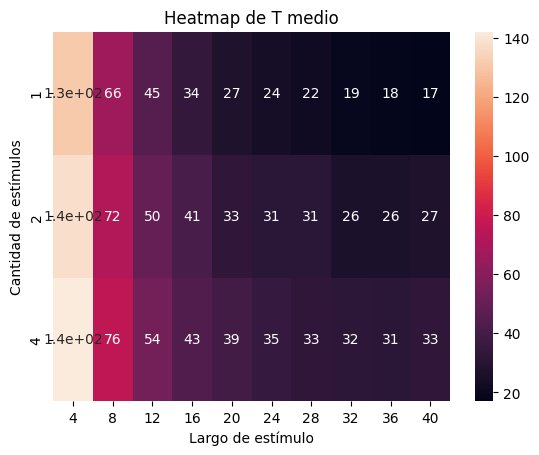

In [48]:
# Crear un DataFrame a partir del diccionario tau medio
df_hm = pd.DataFrame.from_dict(dicc_tau_medio, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T medio")
plt.show()

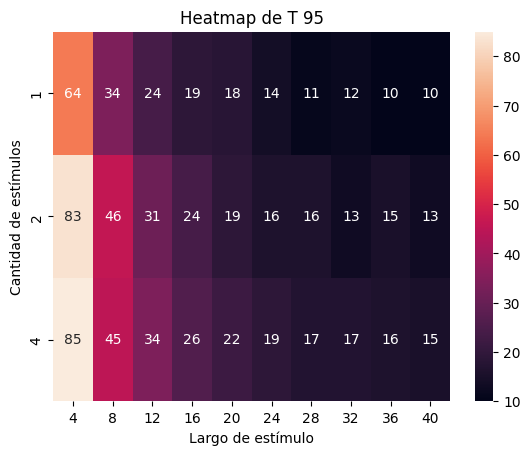

In [49]:
# Crear un DataFrame a partir del diccionario tau 95
df_hm = pd.DataFrame.from_dict(dicc_tau_95, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 95")
plt.show()


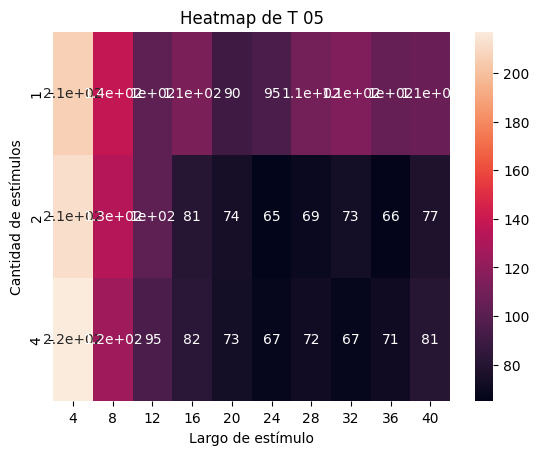

In [50]:
# Crear un DataFrame a partir del diccionario tau 05
df_hm = pd.DataFrame.from_dict(dicc_tau_05, orient='index', columns=['Value'])
df_hm.index = pd.MultiIndex.from_tuples(df_hm.index, names=["Row", "Column"])
df_hm = df_hm.unstack(level='Column')

# Visualizar el DataFrame resultante
df_hm.columns = df_hm.columns.droplevel(0)  # Eliminar niveles innecesarios
df_hm = df_hm.rename_axis(index=None, columns=None)  # Eliminar nombres de los ejes

df_hm

hm = sns.heatmap(df_hm, annot=True)
hm.set(xlabel='Largo de estímulo', ylabel='Cantidad de estímulos', title = "Heatmap de T 05")
plt.show()


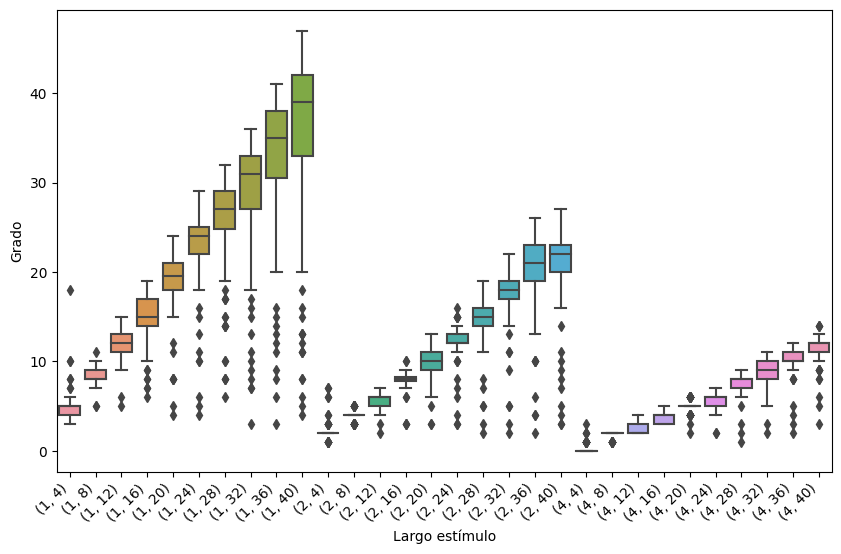

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
df_bp = pd.DataFrame(data=list(zip(*lista_grados)), columns=dicc_tau_medio.keys())
#boxplot without outliers
sns.boxplot(data=df_bp)
plt.xlabel('Largo estímulo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grado')
plt.show()